In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12,8)})
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader
import yfinance as yf

yf.pdr_override()

print("Imported Libraries")

Imported Libraries


In [2]:
# For time stamps
from datetime import datetime

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)       # globals() is a sloppy way of setting the DataFrame names

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [5]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,149.225000,151.281720,147.350560,149.394640,148.988540,8.055937e+07
std,10.679365,10.564601,10.735735,10.666233,10.618952,2.444597e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.099998,143.722496,139.924995,142.457497,141.965420,6.488920e+07
50%,148.864998,150.889999,147.200005,149.295006,148.892677,7.512360e+07
75%,156.062500,158.015003,154.034996,156.720005,155.844021,8.907682e+07
max,173.750000,176.149994,173.119995,174.550003,173.995270,1.826020e+08


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-04-14 to 2023-04-13
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


<AxesSubplot:xlabel='Date'>

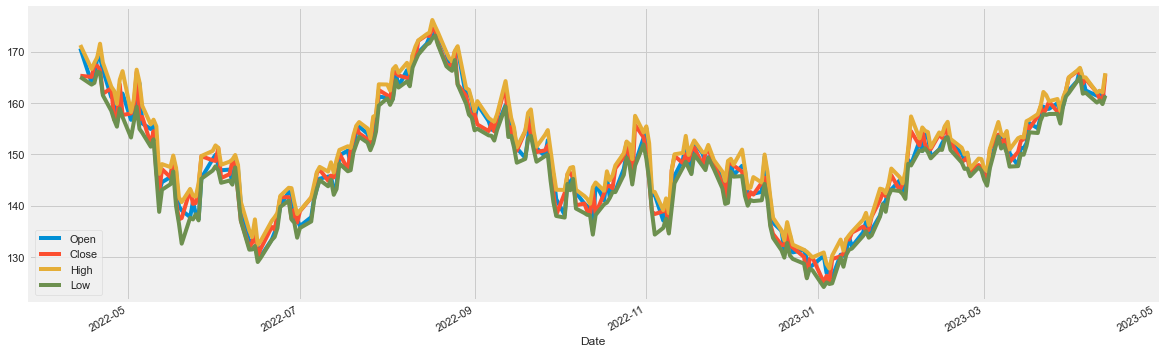

In [7]:
AAPL[["Open", "Close", "High", 'Low']].plot(figsize=(18,6))

### The closing price represents the final price at which the stock was traded on a typical trading day. The closing price of a stock is the usual benchmark that investors use to measure its performance over time. So let us investigate.
### While closing price merely refers to the cost of shares at the end of the day, the adjusted closing price considers other factors like dividends, stock splits, and new stock offerings.The adjusted closing price begins where the closing price ends, it can be called a more accurate measure of stocks' value.

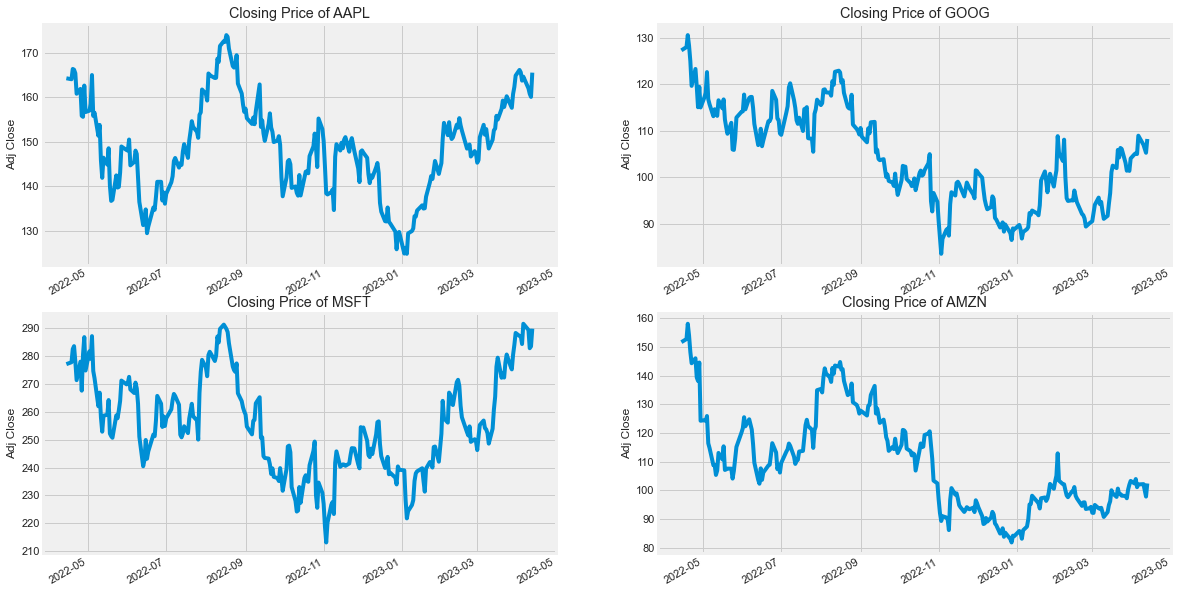

In [8]:
plt.figure(figsize=(18, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.show()

### The stock trading volume would be the number of shares traded between the security's daily open and close. Trade volume, as well as changes in volume over time, are key information for technical traders.

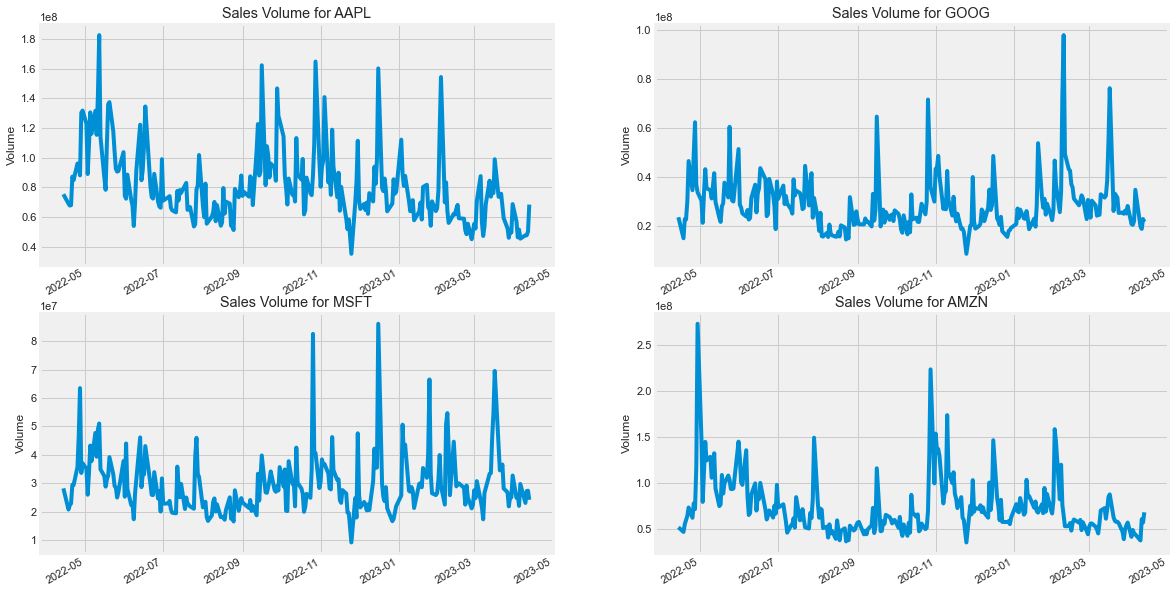

In [9]:
plt.figure(figsize=(18,7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.show()

# Moving Average

In [10]:
# The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price.
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

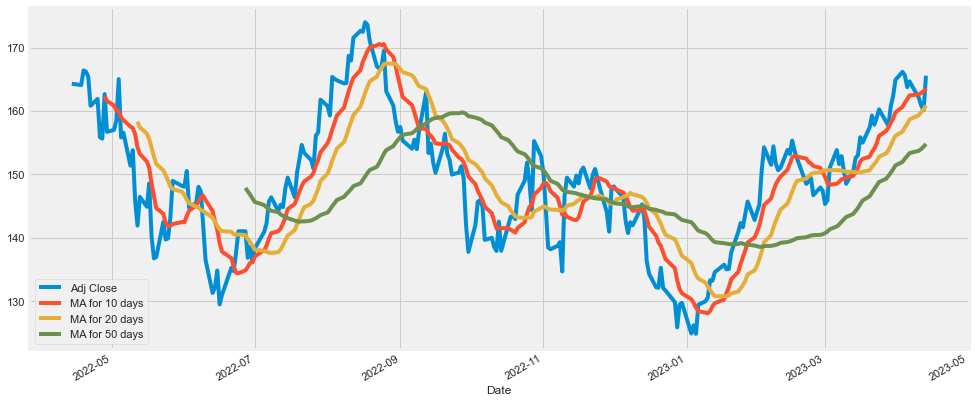

In [11]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(legend=True, figsize=(15,7))
plt.show()

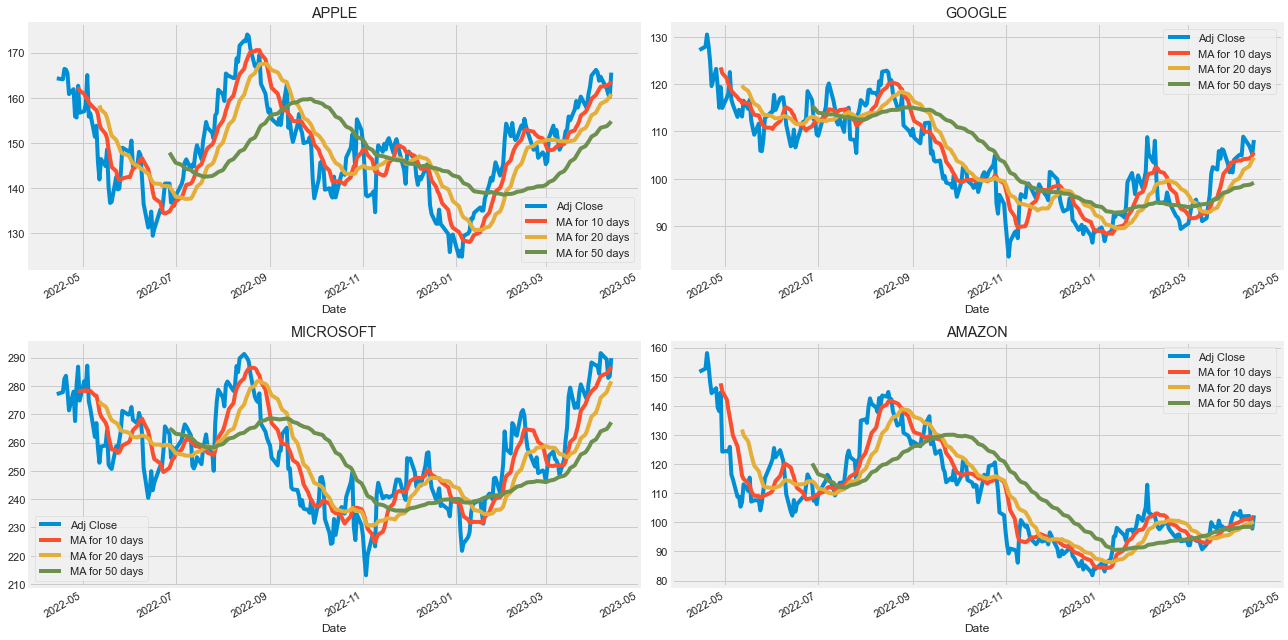

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(9)
fig.set_figwidth(18)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [13]:
# We'll use pct_change to find the percent change for each day to analyze the risk of the stock.
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

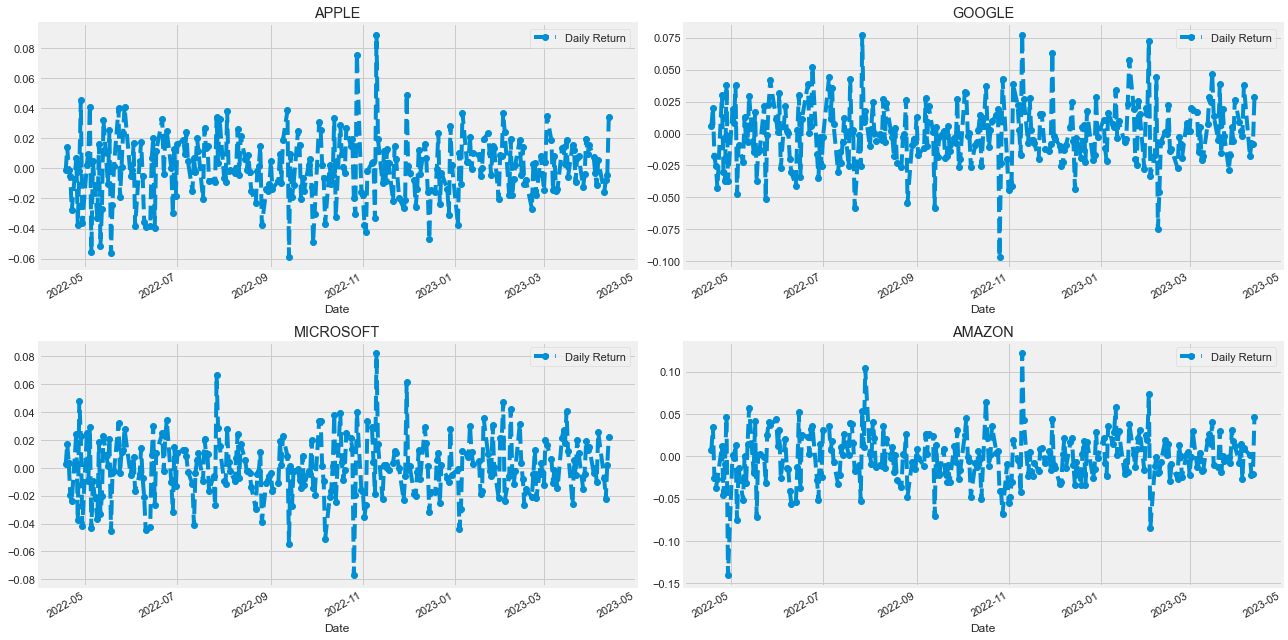

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(9)
fig.set_figwidth(18)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

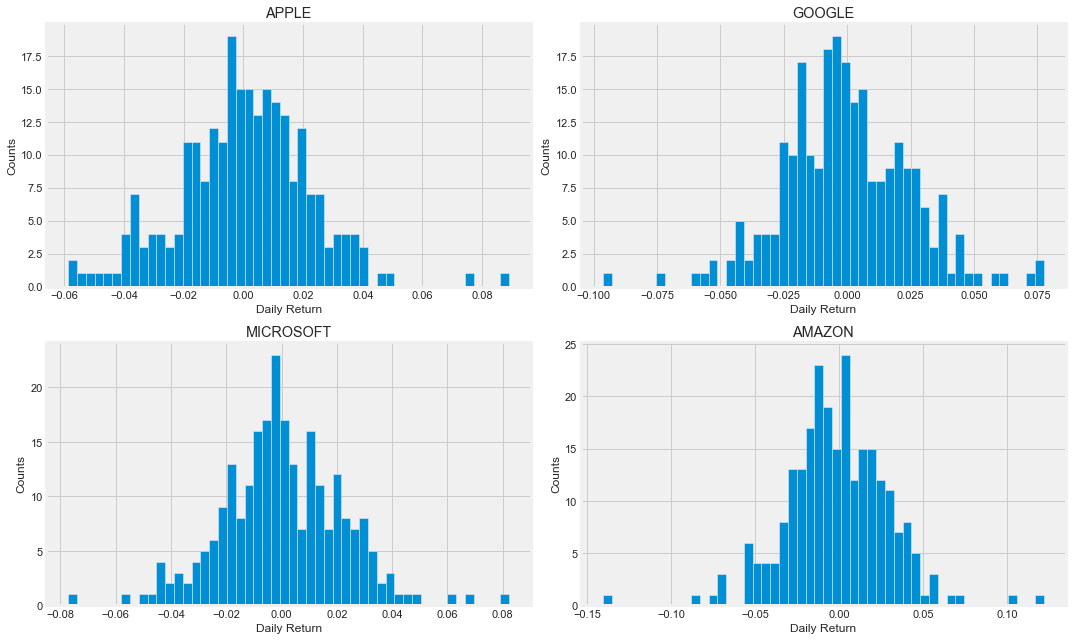

In [15]:
plt.figure(figsize=(15, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-14,NaN,NaN,NaN,NaN
2022-04-18,-0.001331,0.007109,0.005564,0.002466
2022-04-19,0.014115,0.034889,0.020084,0.017040
2022-04-20,-0.001016,-0.026041,-0.017509,0.003715
2022-04-21,-0.004844,-0.037026,-0.025794,-0.019381


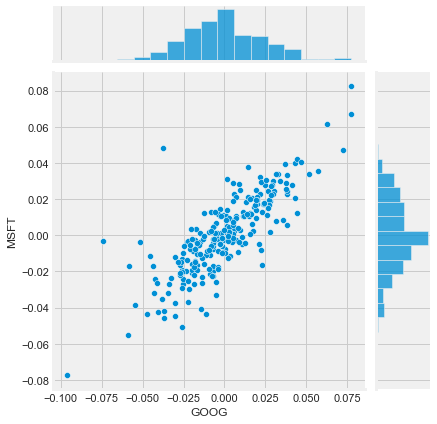

In [17]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets)

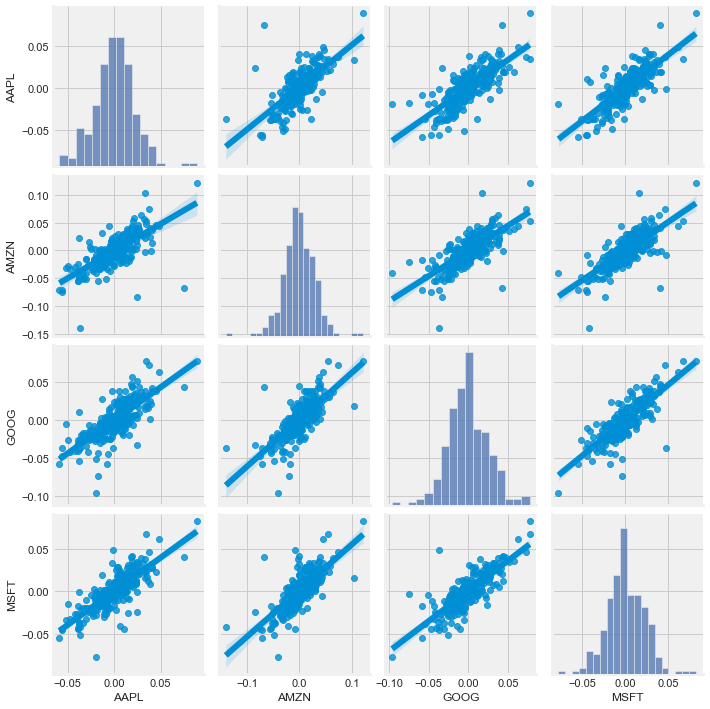

In [18]:
sns.pairplot(tech_rets, kind='reg')

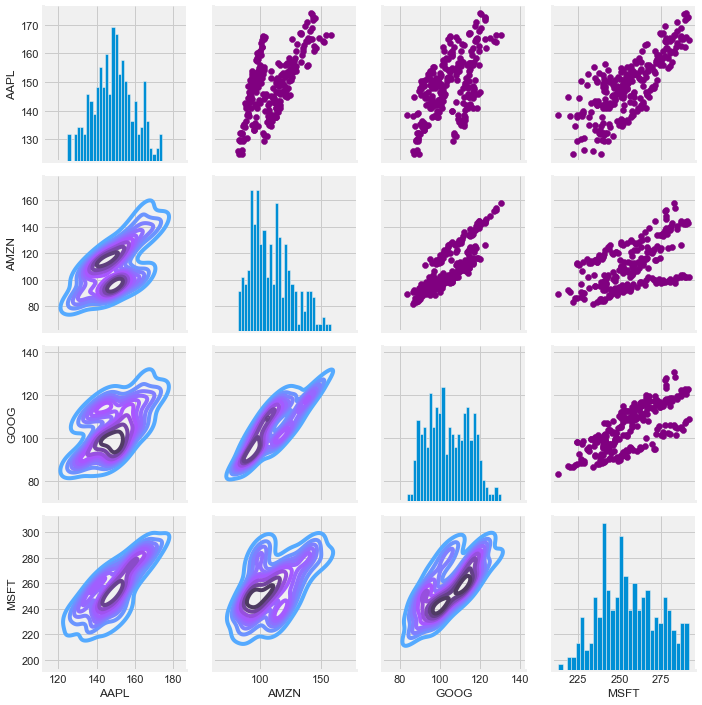

In [19]:
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock return')

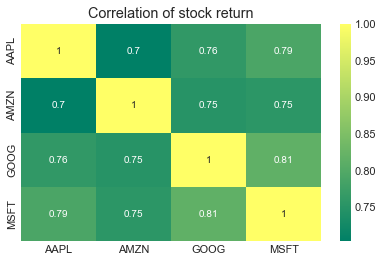

In [20]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

Text(0.5, 1.0, 'Correlation of stock closing price')

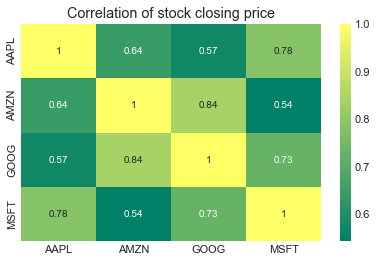

In [21]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

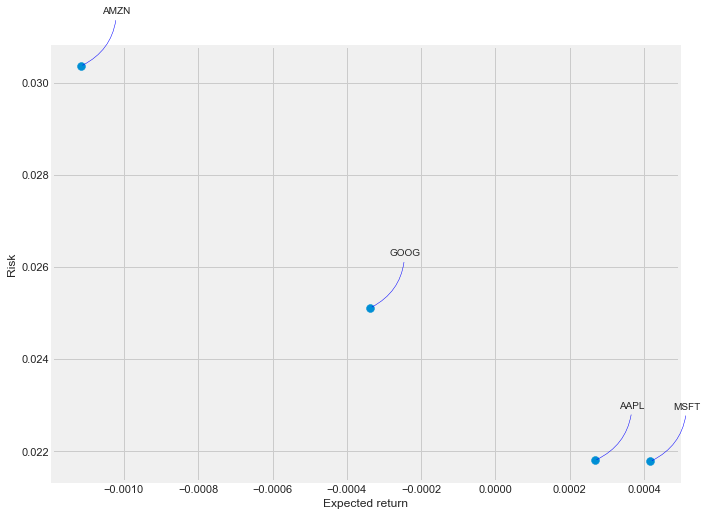

In [22]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [23]:
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500196,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567371,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706894,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839727,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819362,394024400
...,...,...,...,...,...,...
2023-04-06,162.429993,164.960007,162.000000,164.660004,164.660004,45390100
2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47716900
2023-04-11,162.350006,162.360001,160.509995,160.800003,160.800003,47644200


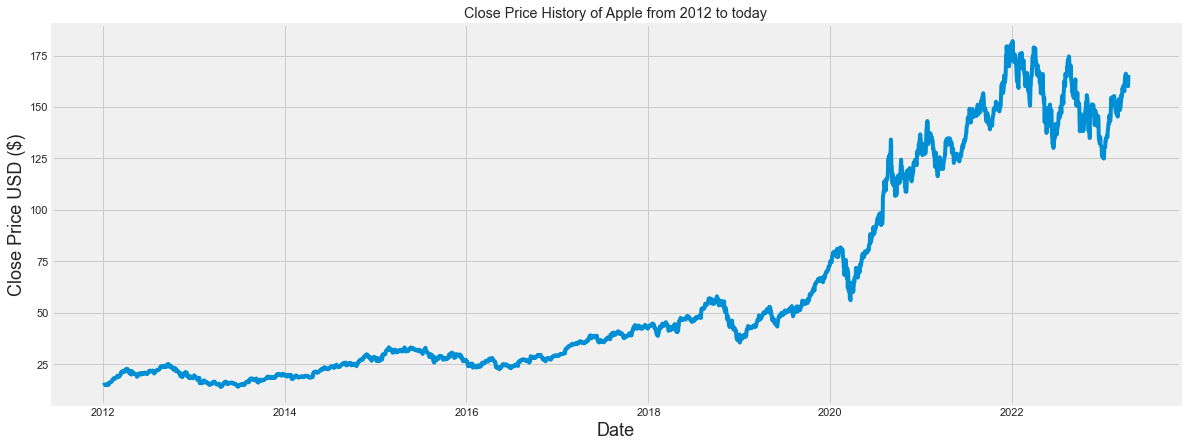

In [24]:
plt.figure(figsize=(18,7))
plt.title('Close Price History of Apple from 2012 to today')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [25]:
# Create a new dataframe with only the 'Close column 
df_close = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = df_close.values

In [26]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))
training_data_len

2555

In [27]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.873797  ],
       [0.8696319 ],
       [0.90211976]])

In [28]:
# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

print(x_train[:2])
print(y_train[:2])

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[[0.00439887 0.00486851 0.00584391 0.00677256 0.00663019 0.00695107
  0.00680444 0.00655793 0.00622217 0.00726133 0.00819848 0.00790947
  0.0063263  0.00783722 0.00634968 0.01192796 0.01149658 0.01205972
  0.01327737 0.01401476 0.01395314 0.01372576 0.01469479 0.01560643
  0.01663922 0.01830739 0.02181161 0.02186474 0.02381555 0.02527333
  0.0227679  0.02373267 0.02371354 0.02641875 0.02603411 0.026746
  0.02802528 0.02873719 0.03078787 0.03228178 0.03271317 0.03286405
  0.03030973 0.02969346 0.02978484 0.03218616 0.03286193 0.03431335
  0.03773469 0.04229932 0.04144504 0.04144716 0.04474738 0.04578017
  0.04504489 0.04437338 0.04367423 0.04599691 0.04759072 0.04825798]
 [0.00486851 0.00584391 0.00677256 0.00663019 0.00695107 0.00680444
  0.00655793 0.00622217 0.00726133 0.00819848 0.00790947 0.0063263
  0.00783722 0.00634968 0.01192796 0.01149658 0.01205972 0.01327737
  0.01401476 0.01395314 0.01372576 0.01469479 0.01560643 0.01663922
  0.01830739 0.02181161 0.02186474 0.02381555 0.02

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

print("Imported libraries")

Imported libraries


In [30]:
# Build the LSTM model
model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2495/2495 [==============================] - 85s 33ms/step - loss: 0.0013


In [32]:
test_data = scaled_data[training_data_len - 60: , :]
y_test = dataset[training_data_len:, :]
x_test = [test_data[i-60:i, 0] for i in range(60, len(test_data))]

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [33]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9/9 [==============================] - 1s 19ms/step


7.9813823621344

In [36]:
# Plot the data
train = df_close[:training_data_len]
valid = df_close[training_data_len:]
valid['Predictions'] = predictions

C:\Users\siddh\AppData\Local\Temp\ipykernel_16252\1419893684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


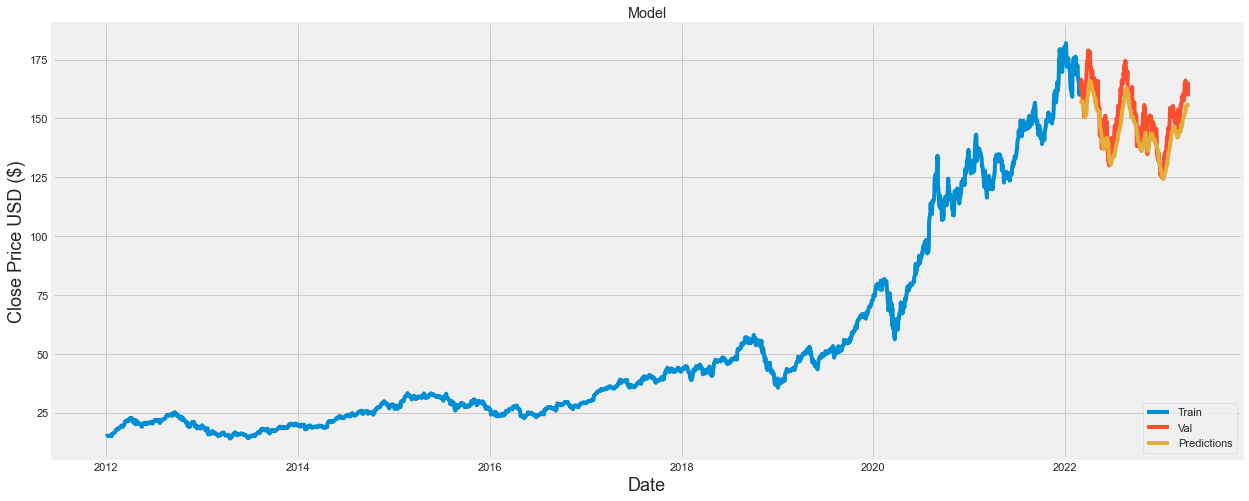

In [37]:
# Visualize the data
plt.figure(figsize=(19,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
valid

,Close,Predictions
Date,,
2022-02-28,165.119995,157.636627
2022-03-01,163.199997,157.370361
2022-03-02,166.559998,157.052170
2022-03-03,166.229996,157.186752
2022-03-04,163.169998,157.423080
...,...,...
2023-04-06,164.660004,155.482376
2023-04-10,162.029999,155.862778
2023-04-11,160.800003,155.797852


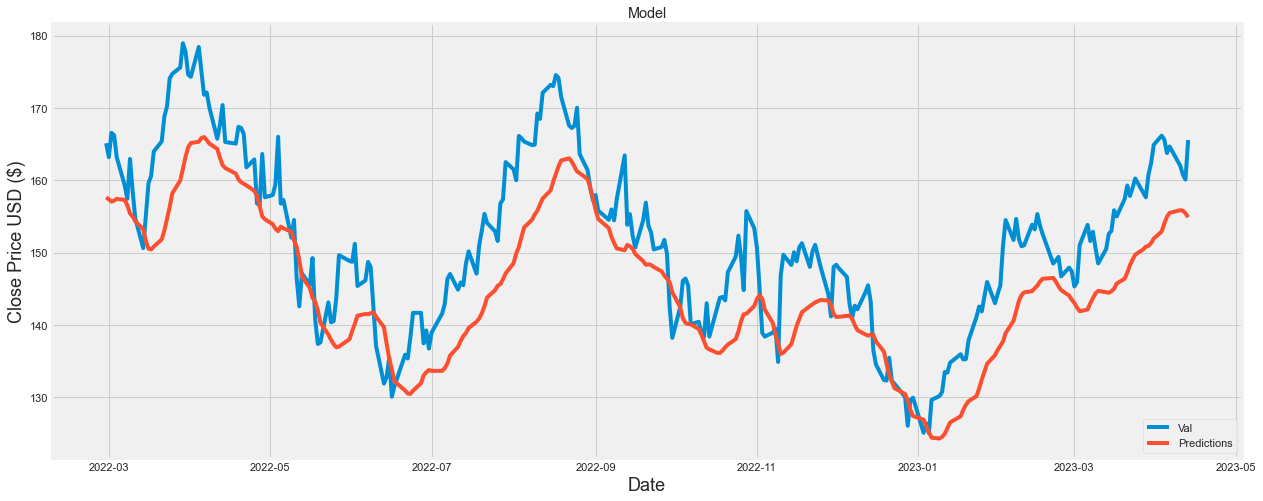

In [39]:
plt.figure(figsize=(19,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()